### Station 1 : ETL
#### `Dataset` : Client Cash Accounts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
wn.filterwarnings('ignore')

#### Load Dataset

In [2]:
dataset = pd.read_csv('datasets/Client_Cash_Accounts.csv')
dataset.head()

,Client,Transaction Date,Type,Customer / Supplier,Reference,Description,Flow,Balance
0,1,6/25/2019,D,DF Manufacturing,O/B INV0051,Consulting Services,1257.19,1257.19
1,1,6/27/2019,W,MM Brokers,O/B S77782,Investment in Shares,-801.46,455.73
2,1,6/30/2019,D,Opening,O/B,Opening Bank Statement Balance,2800.00,3255.73
3,1,6/30/2019,D,Opening,O/B,Opening Bank Statement Balance,900.00,4155.73
4,1,6/30/2019,D,Opening,O/B,Opening Bank Statement Balance,0.00,4155.73


In [106]:
# change the Date format into pandas datatime formate.
dataset['Transaction Date'] = pd.to_datetime(dataset['Transaction Date'])

#### Information of dataset

* Client: The ID of the client associated with the transaction.
* Transaction Date: The date the transaction occurred.
* Type: The type of transaction, either "D" for deposit or "W" for withdrawal.
* Customer / Supplier: The name of the customer or supplier involved in the transaction.
* Reference: A reference code or number associated with the transaction.
* Description: A brief description of the transaction.
* Flow: The amount of money involved in the transaction.
* Balance: The balance of the account after the transaction has been processed.

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Client               209 non-null    int64         
 1   Transaction Date     209 non-null    datetime64[ns]
 2   Type                 209 non-null    object        
 3   Customer / Supplier  209 non-null    object        
 4   Reference            209 non-null    object        
 5   Description          209 non-null    object        
 6   Flow                 209 non-null    float64       
 7   Balance              209 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 13.2+ KB


#### Description of dataset

In [67]:
dataset.describe()

,Client,Transaction Date,Flow,Balance
count,209.0,209,209.000000,209.000000
mean,1.0,2019-12-30 09:24:58.564593408,79.566986,10957.986699
min,1.0,2019-06-25 00:00:00,-2050.000000,455.730000
25%,1.0,2019-09-26 00:00:00,-125.730000,8139.950000
50%,1.0,2019-12-26 00:00:00,-31.460000,10352.420000
75%,1.0,2020-04-13 00:00:00,49.500000,13634.610000
max,1.0,2020-06-26 00:00:00,5207.400000,19736.200000
std,0.0,NaN,1256.766398,4317.244311


#### Handle missing values

#### There is no missing values in our dataset

In [68]:
dataset.isnull().sum()

Client                 0
Transaction Date       0
Type                   0
Customer / Supplier    0
Reference              0
Description            0
Flow                   0
Balance                0
dtype: int64

#### Check the Duplicate values in every columns

In [69]:
dataset['Type'].value_counts()

Type
W    150
D     59
Name: count, dtype: int64

In [70]:
dataset['Client'].value_counts()

Client
1    209
Name: count, dtype: int64

In [71]:
#duplicate value in this columns
dataset['Customer / Supplier'].value_counts()

Customer / Supplier
SQ Financial Services    25
Transfer                 24
Cash                     24
XY Solutions             13
PR Properties            12
Payroll                  12
Hollard                  12
Westpac                  12
IAS Accountants          11
Waltons                   7
ATO                       6
PQW Parking               5
GP Accountants            4
DF Manufacturing          4
SPAR                      4
Opening                   4
WC Financial Advisors     3
TRF Solutions             3
ABC Limited               2
WW Retail                 2
PTY Consultants           2
WS Wholesale              2
Finance Week              1
XX Building Supplies      1
LS Retail                 1
Qantas                    1
The Paint Shop            1
EC Estate Agents          1
RT Office Supplies        1
CC Supplies               1
Economist                 1
GF Training               1
IT Solutions              1
Town Council              1
MM Brokers                1


In [72]:
dataset['Reference'].value_counts()

Reference
Bank Statement    61
Debit Order       48
Invoice           20
Payroll           12
Return             6
O/B                4
INV0056            3
INV0067            3
Statement          2
INV0075            1
IN1156             1
Invoice EXP20      1
INV0073            1
O/B INV0051        1
SA8234             1
Invoice EXP21      1
INV0072            1
INV0071            1
Invoice EXP19      1
INV0074            1
INV0054            1
Invoice EXP09      1
INV0052            1
Invoice EXP10      1
IN1149             1
INV0053            1
Invoice EXP11      1
INV0055            1
TR5674             1
X9987              1
Invoice EXP12      1
INV0057            1
INV0070            1
628054             1
TR6906             1
INV0063            1
INV0059            1
Invoice EXP13      1
TR5982             1
IN1123             1
INV0060            1
INV0062            1
Invoice EXP14      1
INV0061            1
TR6290             1
Invoice EXP15      1
T2518536           1
INV

In [73]:
dataset['Description'].value_counts()

Description
Petty Cash Reimbursement          24
Bank Account Transfer             24
Consulting Services               16
Internet Service Provider         13
Service Fees                      12
Interest paid                     12
Capital repayment                 12
Rent                              12
Salaries                          12
Insurance                         12
Bookkeeping                       11
Paper                              7
Accounting Services                7
Sales Tax                          6
Taxation Services                  5
Parking                            5
Consumables                        4
Opening Bank Statement Balance     3
Investment in Shares               1
Opening Petty Cash Balance         1
Office chair                       1
Rates                              1
Course                             1
Secretarial Services               1
Subscription                       1
Travel                             1
Commission Received       

### Station 2 : Feature Engineering

#### Check the Correlation between the flow and balance

<Axes: >

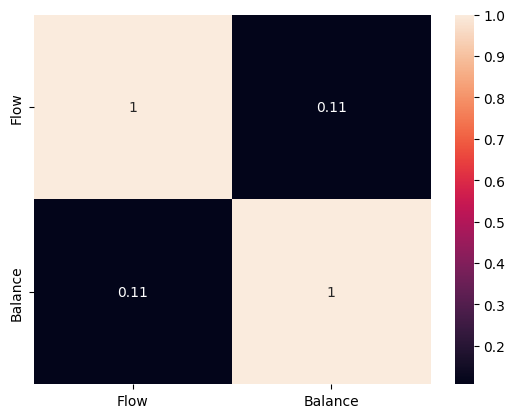

In [89]:
corr_dataset = dataset[['Flow','Balance']]
sns.heatmap(corr_dataset.corr(),annot=True)

* The plot shows a color-coded matrix where each cell represents the correlation between two variables. 
* The diagonal line represents the correlation between a variable and itself, which is always 1
* If the correlation coefficient is close to 1, it indicates a strong positive correlation.
* If it is close to -1, it indicates a strong negative correlation.

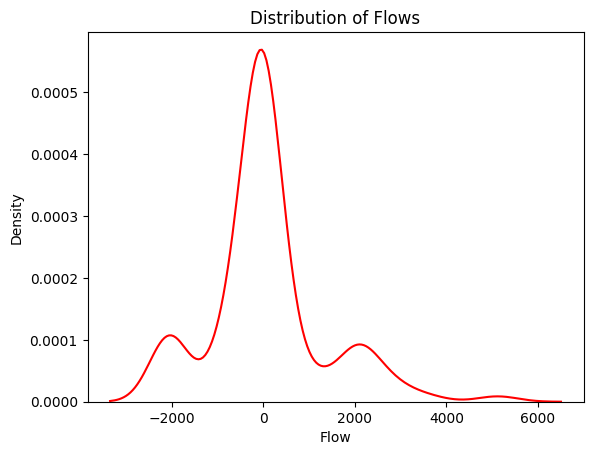

In [101]:
# check the Distribution of cash flows
sns.distplot(dataset["Flow"],kde=True,hist=False,color='r')
plt.title("Distribution of Flows")
plt.xlabel("Flow")
plt.show()

* The plot shows the frequency of different values of flow, indicating the distribution. 
* The plot is customized to show only the kernel density estimate (kde)

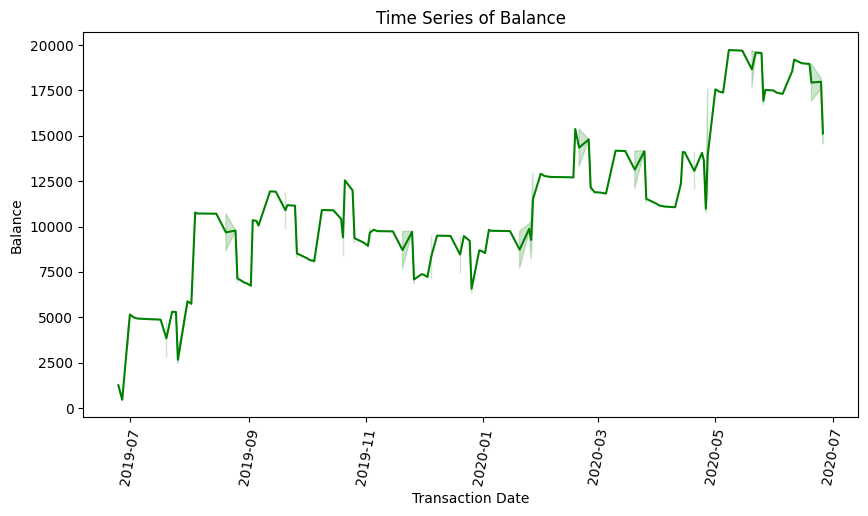

In [75]:
# Times of balance of client
plt.figure(figsize=(10,5))
sns.lineplot(x="Transaction Date", y="Balance", data=dataset,color='Green')
plt.title("Time Series of Balance")
plt.xlabel("Transaction Date")
plt.ylabel("Balance")
plt.xticks(rotation=80)
plt.show()

* This plot shows the results of a time series analysis of the transaction amounts. 
* It is used to identify any trends or patterns in the data over time, such as seasonality or trends.

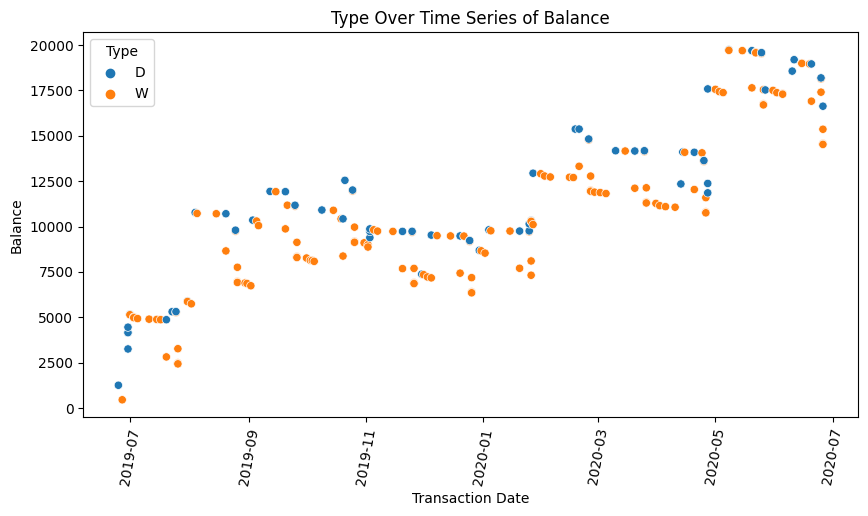

In [76]:
# Client type over the time of balance of client
plt.figure(figsize=(10,5))
sns.scatterplot(x="Transaction Date", y="Balance", data=dataset,hue=dataset['Type'])
plt.title("Type Over Time Series of Balance")
plt.xlabel("Transaction Date")
plt.ylabel("Balance")
plt.xticks(rotation=80)
plt.show()

* The x-axis represents the transaction date, while the y-axis represents the balance of the client account. 
* The hue parameter is used to color-code the points based on the transaction type (deposit vs. withdrawal).
* Each point represents a transaction, and the color of the point indicates the transaction type. 

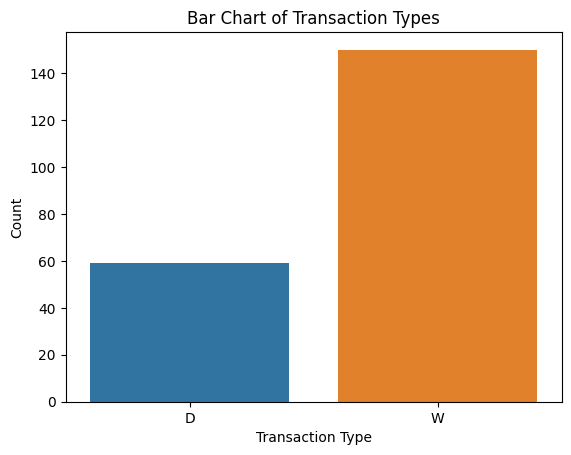

In [77]:
# check the Transaction Types 
sns.countplot(x="Type", data=dataset)
plt.title("Bar Chart of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

* Number of clients (Diposit vs Withdraw)

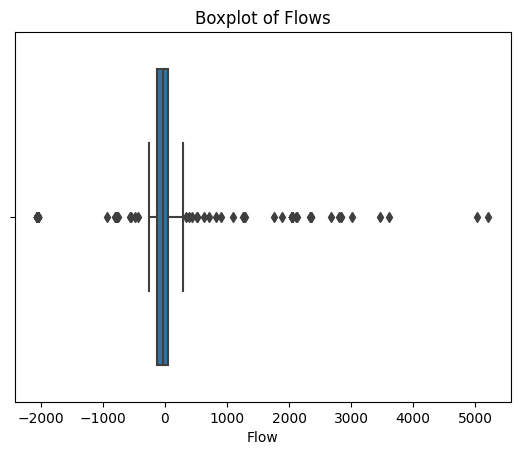

In [78]:
# Check the outliters in our dataset using boxplot
sns.boxplot(x=dataset["Flow"])
plt.title("Boxplot of Flows")
plt.xlabel("Flow")
plt.show()

* The plot shows a box that represents the interquartile range (IQR) of the data, with the median value marked by a horizontal line inside the box. 
* The whiskers of the plot extend to the minimum and maximum values within the IQR multiplied by an allowable range (usually 1.5 times the IQR). 
* Any data points outside of the whiskers are considered to be outliers and are represented by individual points.

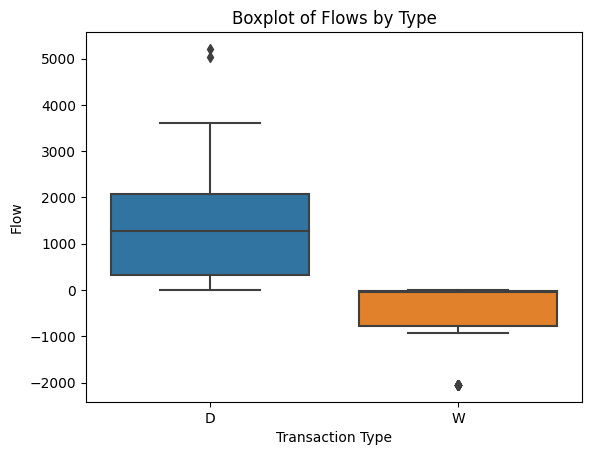

In [79]:
# Check the outliters on basis of type of client
sns.boxplot(x="Type", y="Flow", data=dataset)
plt.title("Boxplot of Flows by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Flow")
plt.show()

* The plot shows two boxes side by side, one for each transaction type, with the median value marked by a horizontal line inside the box. 
* The whiskers of the plot extend to the minimum and maximum values within the IQR multiplied by an allowable range (usually 1.5 times the IQR). 
* Any data points outside of the whiskers are considered to be outliers and are represented by individual points
* The plot helps to compare the distribution of cash flows for deposit and withdrawal transactions and identify any extreme values that may be considered outliers for each type of transaction.

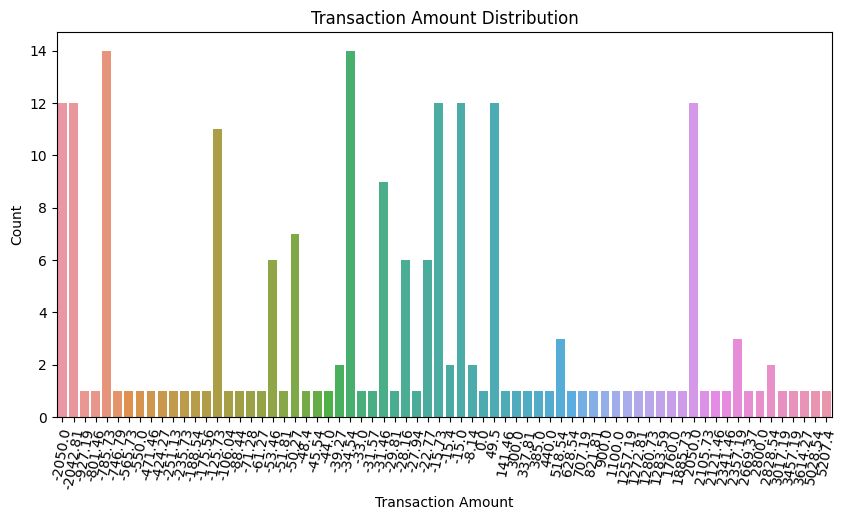

In [80]:
# Transaction amount distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Flow', data=dataset)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Transaction Amount Distribution')
plt.xticks(rotation=80)
plt.show()

* Each bar represents a specific transaction amount, and the height of the bar indicates the number of transactions with that amount. 

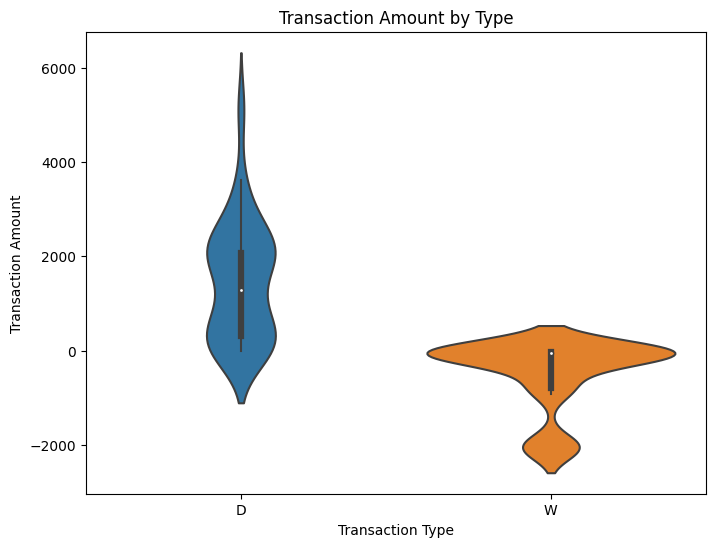

In [93]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Type', y='Flow', data=dataset)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Type')
plt.show()

* The x-axis represents the transaction type (deposit vs. withdrawal), while the y-axis represents the transaction amount (flow). 
* Each violin plot shows the distribution of transaction amounts for a specific transaction type, with the width of the violin indicating the density of the data points.

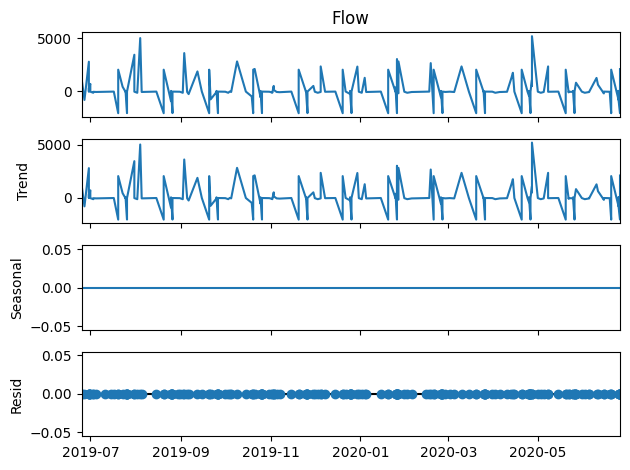

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dataset['Flow'], model='additive', period=1)
fig = decomposition.plot()
plt.show()

* The decomposition plot helps to visualize the different components of the time series data and understand how they contribute to the overall pattern of the data. 
* It can be used to identify any trends or seasonal patterns in the data that is useful for for analysis.

### Data Preprocessing
* One Hot encoding
* Label Encoding

In [119]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dataset['Type'])
dataset['Type'] = le.fit_transform(dataset['Type'])

In [120]:
dataset.head()

,Client,Transaction Date,Type,Customer / Supplier,Reference,Description,Flow,Balance
0,1,6/25/2019,0,DF Manufacturing,O/B INV0051,Consulting Services,1257.19,1257.19
1,1,6/27/2019,1,MM Brokers,O/B S77782,Investment in Shares,-801.46,455.73
2,1,6/30/2019,0,Opening,O/B,Opening Bank Statement Balance,2800.00,3255.73
3,1,6/30/2019,0,Opening,O/B,Opening Bank Statement Balance,900.00,4155.73
4,1,6/30/2019,0,Opening,O/B,Opening Bank Statement Balance,0.00,4155.73


In [121]:
# OneHot Encoding
categorical_columns = ['Customer / Supplier', 'Reference', 'Description']
dataset = pd.get_dummies(data=dataset, columns=categorical_columns, dtype=int)

In [122]:
dataset = dataset.drop(['Transaction Date','Client'],axis=1)
dataset.head()

,Type,Flow,Balance,Customer / Supplier_ABC Limited,Customer / Supplier_ATO,Customer / Supplier_CC Supplies,Customer / Supplier_Cash,Customer / Supplier_DF Manufacturing,Customer / Supplier_Digicom,Customer / Supplier_EC Estate Agents,...,Description_Petty Cash Reimbursement,Description_Rates,Description_Rent,Description_Salaries,Description_Sales Tax,Description_Secretarial Services,Description_Service Fees,Description_Subscription,Description_Taxation Services,Description_Travel
0,0,1257.19,1257.19,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-801.46,455.73,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2800.00,3255.73,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,900.00,4155.73,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.00,4155.73,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Lilnear Regression Analysis

In [125]:
# seperate the target and independent variable
x = dataset.drop('Balance',axis=1)
y = dataset['Balance']

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [139]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x,y)

RandomForestRegressor()

In [140]:
acc = model.score(x_test,y_test)
print('The accuracy of the model is ',acc)

The accuracy of the model is  0.34833842958281647
